In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
import shutil



In [31]:
# OPEN DATASET AND FIRST LOOK

dataset_path = "fruit_datasets/zenodo_data/FruQ-multi"
fruit_folders = [folder for folder in os.listdir(dataset_path)]
print(f" Different classes : {fruit_folders}")
states = ["Good", "mild", "Rotten"]

 Different classes : ['BananaDB', 'CucumberQ', 'GrapeQ', 'KakiQ', 'PapayaQ', 'PeachQ', 'PearQ', 'PepperQ', 'StrawberryQ', 'tomatoQ', 'WatermeloQ']


In [32]:
# PREPROCESSING : start at 1 for each state of each fruit (at the start the numbers are along all the 3 states,
# for example : banana : good : 1-100; mild : 101-150; rotten : 151-180 -> banana : good : 1-100; mild : 1-50; rotten : 1-30 (useful later)

def renumber_images_in_categories(dataset_path):
    """
    Renumber images in 'Good', 'mild', and 'Rotten' folders to start from 1 in each state.

    Args:
        dataset_path (str): Path to the root dataset directory.
    """
    # Parcourir chaque fruit dans le dataset
    for fruit in os.listdir(dataset_path):
        fruit_path = os.path.join(dataset_path, fruit)
        
        # Vérifier si c'est bien un dossier
        if os.path.isdir(fruit_path):
            print(f"Processing fruit: {fruit}")
            
            # Parcourir chaque état (Good, mild, Rotten)
            for state in states:
                state_path = os.path.join(fruit_path, state)
                
                if os.path.isdir(state_path):
                    print(f"  Renumbering state: {state}")
                    image_files = sorted([img for img in os.listdir(state_path) if img.endswith(('jpg', 'png', 'jpeg'))])
                    
                    # Renommer les fichiers pour commencer à 1
                    for idx, image_file in enumerate(image_files, start=1):
                        old_path = os.path.join(state_path, image_file)
                        new_name = f"image{idx}.png"  # Nouveau nom avec extension .png (changez si nécessaire)
                        new_path = os.path.join(state_path, new_name)
                        
                        # Renommer le fichier
                        shutil.move(old_path, new_path)
                        print(f"    Renamed '{image_file}' to '{new_name}'")
                else:
                    print(f"  State folder '{state}' does not exist for {fruit}. Skipping.")

    print("Renumbering completed successfully!")


renumber_images_in_categories(dataset_path)

Processing fruit: BananaDB
  Renumbering state: Good
    Renamed 'Image1.png' to 'image1.png'
    Renamed 'Image101.png' to 'image2.png'
    Renamed 'Image103.png' to 'image3.png'
    Renamed 'Image105.png' to 'image4.png'
    Renamed 'Image107.png' to 'image5.png'
    Renamed 'Image109.png' to 'image6.png'
    Renamed 'Image11.png' to 'image7.png'
    Renamed 'Image111.png' to 'image8.png'
    Renamed 'Image113.png' to 'image9.png'
    Renamed 'Image115.png' to 'image10.png'
    Renamed 'Image117.png' to 'image11.png'
    Renamed 'Image119.png' to 'image12.png'
    Renamed 'Image121.png' to 'image13.png'
    Renamed 'Image123.png' to 'image14.png'
    Renamed 'Image125.png' to 'image15.png'
    Renamed 'Image127.png' to 'image16.png'
    Renamed 'Image129.png' to 'image17.png'
    Renamed 'Image13.png' to 'image18.png'
    Renamed 'Image131.png' to 'image19.png'
    Renamed 'Image133.png' to 'image20.png'
    Renamed 'Image135.png' to 'image21.png'
    Renamed 'Image137.png' to 'image

In [33]:
# Basic functions to get any image by category of fruit, state, number (based on path) and return it in a strcuture Imagedata 


# --- Structure ImageData ---
class ImageData:
    """
    Structure to hold image details.
    """
    def __init__(self, path, matrix, fruit, state):
        self.path = path          # Full path to the image
        self.matrix = matrix      # Image matrix (RGB)
        self.fruit = fruit        # Fruit name
        self.state = state        # Fruit state (Good, mild, Rotten)


# --- Function to load image data ---
def load_image_data(fruit, state, image_path):
    """
    Load a specific image by its filename.

    Args:
        fruit (str): Fruit category.
        state (str): State of the fruit.
        image_path (str): Name of the image file (e.g., 'image1.png').

    Returns:
        ImageData: A structure containing path, image matrix, fruit, and state.
    """
    # Build the image path
    img_path = os.path.join(dataset_path, fruit, state, f"image{image_path}.png")
    if not os.path.isfile(img_path):
        print(f"Error: Image '{img_path}' not found.")
        return None

    image = cv2.imread(img_path)
    if image is not None:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return ImageData(path=img_path, matrix=image_rgb, fruit=fruit, state=state)
    else:
        print(f"Error: Failed to load image '{img_path}'.")
        return None


# --- Function to display an image ---
def display_image(image_data):
    """
    Display an image from ImageData.

    Args:
        image_data (ImageData): Object containing image details.
    """
    if image_data and image_data.matrix is not None:
        plt.imshow(image_data.matrix)
        plt.title(f"Fruit: {image_data.fruit} | State: {image_data.state}")
        plt.axis("off")
        plt.show()
    else:
        print("Error: ImageData is invalid or image matrix is None.")



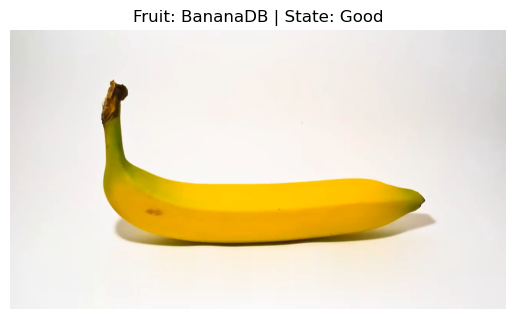

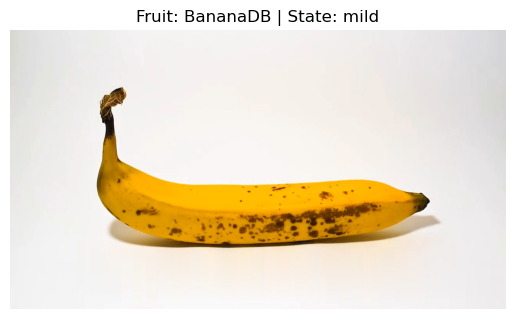

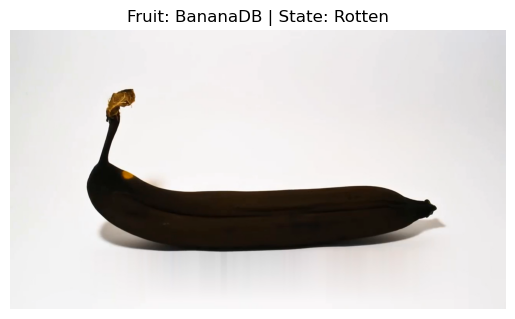


=== Global Statistics ===

Classe 'BananaDB':
  - Good: 179 image(s)
  - mild: 96 image(s)
  - Rotten: 337 image(s)

Classe 'CucumberQ':
  - Rotten: 116 image(s)

Classe 'GrapeQ':
  - Good: 227 image(s)
  - Rotten: 288 image(s)

Classe 'KakiQ':
  - Good: 545 image(s)
  - Rotten: 340 image(s)

Classe 'PapayaQ':
  - Good: 130 image(s)
  - Rotten: 413 image(s)

Classe 'PeachQ':
  - Good: 425 image(s)
  - Rotten: 584 image(s)

Classe 'PearQ':
  - Good: 504 image(s)
  - Rotten: 100 image(s)

Classe 'PepperQ':
  - Good: 48 image(s)
  - Rotten: 660 image(s)

Classe 'StrawberryQ':
  - Rotten: 97 image(s)

Classe 'TomatoQ':

Classe 'WatermeloQ':
  - Good: 51 image(s)
  - Rotten: 150 image(s)


In [34]:
# --- Dataset statistics ---
global_stats = {}
fruit_folders = ["BananaDB", "CucumberQ", "GrapeQ", "KakiQ", "PapayaQ", "PeachQ", "PearQ", "PepperQ", "StrawberryQ", "TomatoQ", "WatermeloQ"]  # Add all relevant fruit folders

# Calculate the global statistics
for fruit in fruit_folders:
    fruit_path = os.path.join(dataset_path, fruit)
    state_stats = {}
    
    for state in states:
        state_path = os.path.join(fruit_path, state)
        
        if not os.path.exists(state_path):
            continue
        
        image_files = [f for f in os.listdir(state_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        state_stats[state] = len(image_files)
        
    global_stats[fruit] = state_stats

# Display the first image for BananaDB in each state
for state in states:
    test_image = load_image_data("BananaDB", state, 1)  # Fetch image1.png in each state folder
    if test_image:
        display_image(test_image)

# Display global statistics
print("\n=== Global Statistics ===")
for fruit, stats in global_stats.items():
    print(f"\nClasse '{fruit}':")
    for state, count in stats.items():
        print(f"  - {state}: {count} image(s)")


In [35]:
def compute_histogram(image_data, color_space="RGB", bins=32):
    """
    Compute histograms for the three channels of the image in a specified color space.

    Args:
        image_data (ImageData): Object containing image details.
        color_space (str): The color space to use ('RGB', 'HSV', or 'HLS').
        bins (int): Number of bins for the histogram.

    Returns:
        histograms (list): List of histograms for each channel in the specified color space.
    """
    histograms = []

    if image_data and image_data.matrix is not None:
        # Convert the image to the specified color space
        if color_space == "HSV":
            img = cv2.cvtColor(image_data.matrix, cv2.COLOR_RGB2HSV)
        elif color_space == "HLS":
            img = cv2.cvtColor(image_data.matrix, cv2.COLOR_RGB2HLS)
        else:  # Default to RGB
            img = image_data.matrix

        # Compute histograms for the three channels
        for channel in [0, 1, 2]:  # Three channels for RGB/HSV/HLS
            hist = cv2.calcHist([img], [channel], None, [bins], [0, 256])
            hist = cv2.normalize(hist, hist).flatten()
            histograms.append(hist)
    else:
        print("Error: ImageData is invalid or image matrix is None.")
    
    return histograms


def display_histogram(histograms, title="Histogram - RGB"):
    """
    Display histograms for the RGB channels.

    Args:
        histograms (list): List of histograms for each channel.
        title (str): Title of the histogram plot.
    """
    colors = ['red', 'green', 'blue']
    plt.figure(figsize=(8, 4))
    for hist, color in zip(histograms, colors):
        plt.plot(hist, color=color)
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("Frequency")
    plt.show()

def compute_pca(histograms, n_components=2):
    """
    Apply PCA to reduce the dimensionality of histogram vectors.

    Args:
        histograms (list): List of histogram vectors.
        n_components (int): Number of dimensions for PCA.

    Returns:
        pca_result (np.ndarray): PCA-transformed data with specified components.
    """
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(histograms)
    return pca_result

def display_pca(pca_results, states):
    """
    Display the PCA results as a scatter plot.

    Args:
        pca_results (np.ndarray): PCA-transformed histogram vectors.
        states (list): List of states corresponding to the PCA results.
    """
    plt.figure(figsize=(6, 6))
    plt.scatter(pca_results[:, 0], pca_results[:, 1], c=['green', 'orange', 'red'], s=100)
    for i, state in enumerate(states):
        plt.text(pca_results[i, 0], pca_results[i, 1], state, fontsize=12, ha='center', va='center')
    plt.title("PCA of Histograms - RGB Channels")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.show()



Processing image: fruit_datasets/zenodo_data/FruQ-multi/BananaDB/mild/image1.png
Histogram sizes - RGB: 3, HSV: 3, HLS: 3
Final Feature Vector Size: 6, Content: [0.36751460944765857, 0.07687670161527545, -0.4927072171782025, -0.3934930397500625, -0.48289725809738465, -0.3991009865206156]


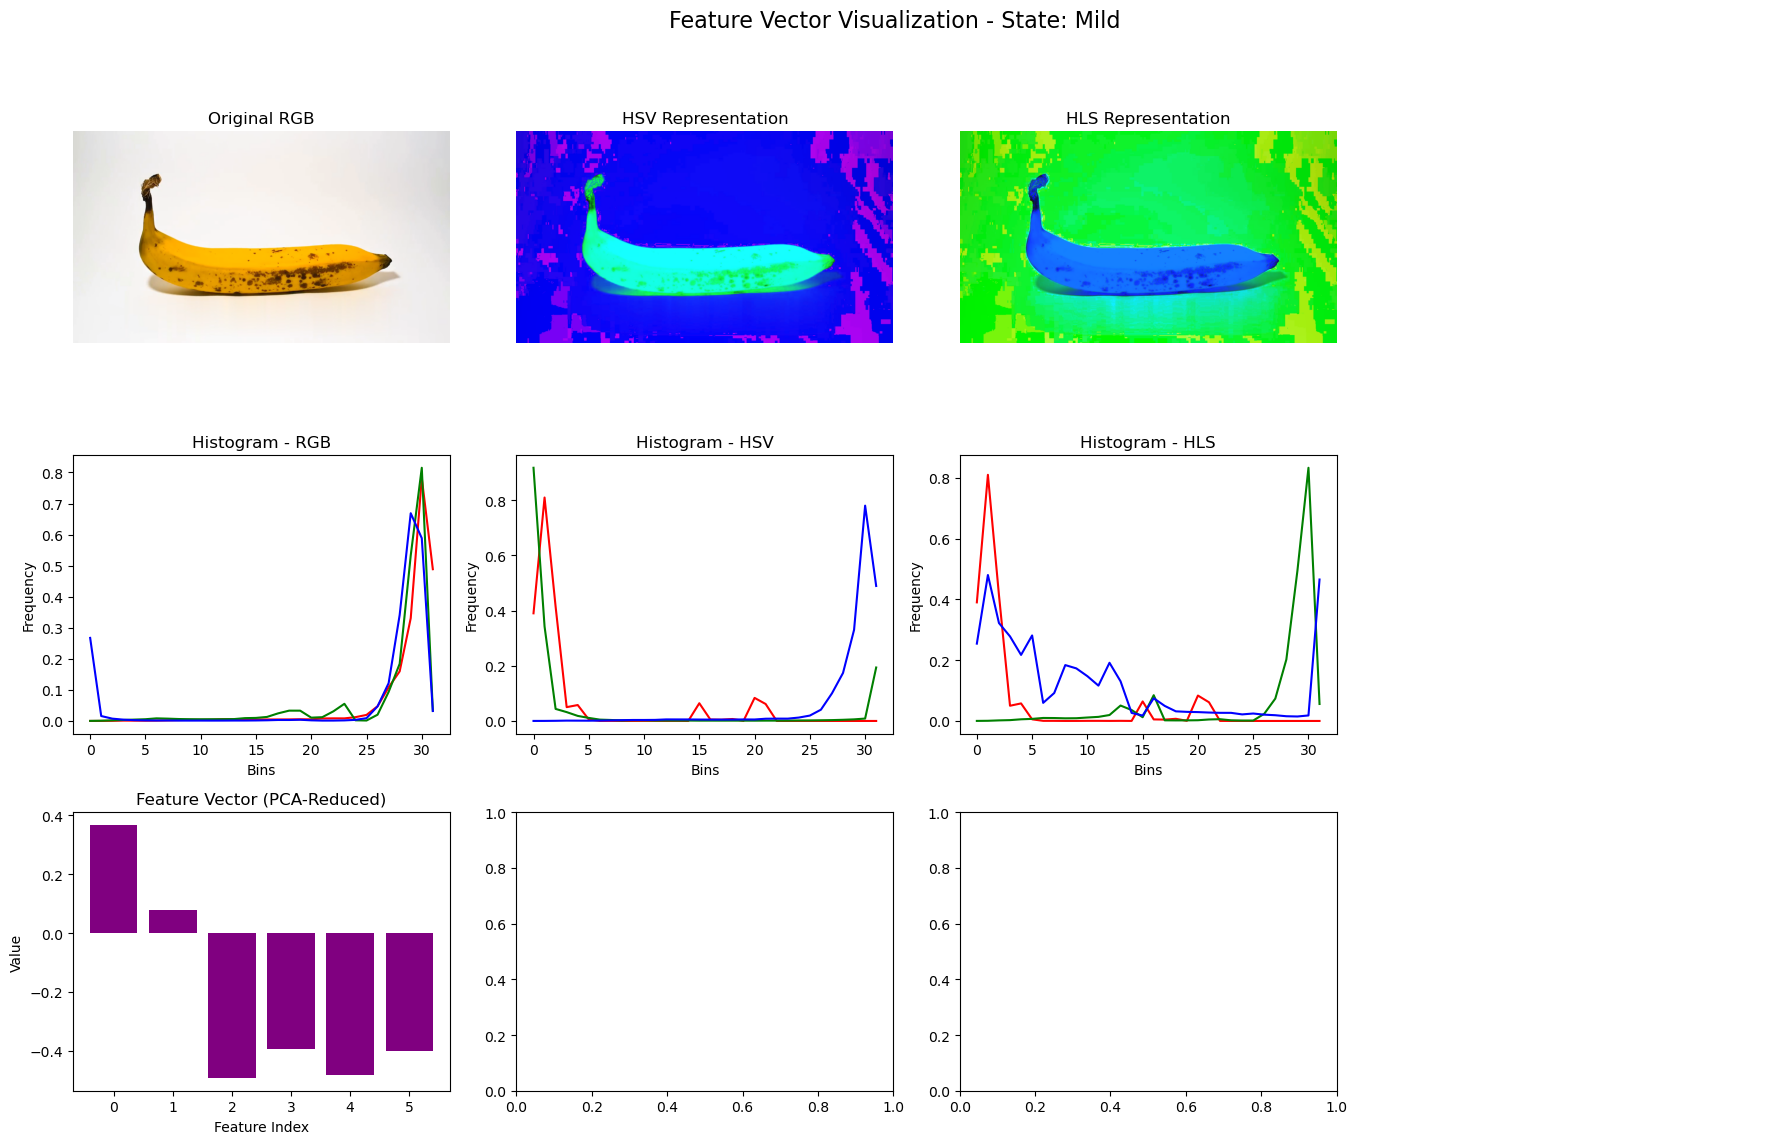

Feature vector for state 'Mild': [0.36751460944765857, 0.07687670161527545, -0.4927072171782025, -0.3934930397500625, -0.48289725809738465, -0.3991009865206156]


In [36]:
def calculate_feature_vector(image_data, pca_dimensions=2):
    """
    Calculate the feature vector for an image and return histograms for RGB, HSV, HLS.
    
    Returns:
        feature_vector (list): Combined PCA-reduced features.
        hist_rgb, hist_hsv, hist_hls: Histograms for each color space.
    """
    print(f"Processing image: {image_data.path}")
    
    # Step 1: Compute histograms for each color space
    hist_rgb = compute_histogram(image_data, color_space="RGB")
    hist_hsv = compute_histogram(image_data, color_space="HSV")
    hist_hls = compute_histogram(image_data, color_space="HLS")
    
    print(f"Histogram sizes - RGB: {len(hist_rgb)}, HSV: {len(hist_hsv)}, HLS: {len(hist_hls)}")
    
    # Step 2: Apply PCA and take the first row
    pca_result_rgb = compute_pca(hist_rgb, pca_dimensions)[0]
    pca_result_hsv = compute_pca(hist_hsv, pca_dimensions)[0]
    pca_result_hls = compute_pca(hist_hls, pca_dimensions)[0]
    
    # Combine the PCA results
    feature_vector = list(pca_result_rgb) + list(pca_result_hsv) + list(pca_result_hls)
    print(f"Final Feature Vector Size: {len(feature_vector)}, Content: {feature_vector}")
    
    return feature_vector, hist_rgb, hist_hsv, hist_hls

def display_general(image_data, state, feature_vector, hist_rgb, hist_hsv, hist_hls):
    """
    Display the image in RGB, HSV, and HLS domains, histograms, and the feature vector.

    Args:
        image_data (ImageData): Object containing the image details.
        state (str): The state of the fruit (e.g., 'Good', 'mild', 'Rotten').
        feature_vector (list): The combined PCA-reduced feature vector.
        hist_rgb, hist_hsv, hist_hls: Histograms for RGB, HSV, and HLS color spaces.
    """
    # Step 1: Prepare images in HSV and HLS
    img_hsv = cv2.cvtColor(image_data.matrix, cv2.COLOR_RGB2HSV)
    img_hls = cv2.cvtColor(image_data.matrix, cv2.COLOR_RGB2HLS)

    # Step 2: Create a figure for all displays
    fig, axes = plt.subplots(3, 4, figsize=(18, 12))
    fig.suptitle(f"Feature Vector Visualization - State: {state}", fontsize=16)

    # --- Display images ---
    axes[0, 0].imshow(image_data.matrix)
    axes[0, 0].set_title("Original RGB")
    axes[0, 0].axis("off")

    axes[0, 1].imshow(img_hsv)
    axes[0, 1].set_title("HSV Representation")
    axes[0, 1].axis("off")

    axes[0, 2].imshow(img_hls)
    axes[0, 2].set_title("HLS Representation")
    axes[0, 2].axis("off")

    # --- Display histograms ---
    # RGB Histogram
    axes[1, 0].plot(hist_rgb[0], color='red')
    axes[1, 0].plot(hist_rgb[1], color='green')
    axes[1, 0].plot(hist_rgb[2], color='blue')
    axes[1, 0].set_title("Histogram - RGB")
    axes[1, 0].set_xlabel("Bins")
    axes[1, 0].set_ylabel("Frequency")

    # HSV Histogram
    axes[1, 1].plot(hist_hsv[0], color='red')
    axes[1, 1].plot(hist_hsv[1], color='green')
    axes[1, 1].plot(hist_hsv[2], color='blue')
    axes[1, 1].set_title("Histogram - HSV")
    axes[1, 1].set_xlabel("Bins")
    axes[1, 1].set_ylabel("Frequency")

    # HLS Histogram
    axes[1, 2].plot(hist_hls[0], color='red')
    axes[1, 2].plot(hist_hls[1], color='green')
    axes[1, 2].plot(hist_hls[2], color='blue')
    axes[1, 2].set_title("Histogram - HLS")
    axes[1, 2].set_xlabel("Bins")
    axes[1, 2].set_ylabel("Frequency")

    # --- Display feature vector ---
    axes[2, 0].bar(range(len(feature_vector)), feature_vector, color='purple')
    axes[2, 0].set_title("Feature Vector (PCA-Reduced)")
    axes[2, 0].set_xlabel("Feature Index")
    axes[2, 0].set_ylabel("Value")

    # Hide empty subplots if any
    for i in range(3, 4):
        axes[0, i].axis('off')
        axes[1, i].axis('off')
        axes[2, i].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    plt.close(fig)  # Fermer la figure pour éviter les conflits graphiques

    print(f"Feature vector for state '{state}': {feature_vector}")


# Example usage
test_image = load_image_data("BananaDB", "mild", 1)
feature_vector, hist_rgb, hist_hsv, hist_hls = calculate_feature_vector(test_image, pca_dimensions=2)
display_general(test_image, "Mild", feature_vector, hist_rgb, hist_hsv, hist_hls)


In [37]:
def custom_knn_predict(X_train, y_train, X_test, k):
    """
    Custom KNN prediction function.
    Args:
        X_train (np.ndarray): Training feature vectors.
        y_train (np.ndarray): Training labels.
        X_test (np.ndarray): Test feature vectors.
        k (int): Number of neighbors for KNN.
    Returns:
        np.ndarray: Predicted labels for the test set.
    """
    predictions = []

    for x_test in X_test:
        # Calculate distances between the test point and all training points
        distances = cdist([x_test], X_train, metric='euclidean')[0]
        
        # Find the indices of the k nearest neighbors
        nearest_indices = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        nearest_labels = y_train[nearest_indices]

        # Determine the most common label
        unique_labels, counts = np.unique(nearest_labels, return_counts=True)
        most_common_label = unique_labels[np.argmax(counts)]

        predictions.append(most_common_label)

    return np.array(predictions)

Tasks
- try other feature vector - texture details, pca=3
- defect segmentation - no mask it will be difficult. 
- fix file classes that do not show up.
- How to improve classification with other methods
  - Another classifier(CNN)
  - regression to measure score between 0 and 1. Priority
- Split data, the same fruit doesn't appear in both training and testing.
- Test the classifer on fruits that it hasn't been trained on(to observe if the classifier recognises individual fruit characteristics or just quality set data)
- GLCM for texture


Processing image: fruit_datasets/zenodo_data/FruQ-multi/BananaDB/Good/image1.png
Histogram sizes - RGB: 3, HSV: 3, HLS: 3
Final Feature Vector Size: 6, Content: [0.4169006712124129, -0.1167540732932226, 0.5090505793922029, -0.3856987101540547, -0.501115708155958, -0.46736700571257833]
Processing image: fruit_datasets/zenodo_data/FruQ-multi/BananaDB/Good/image2.png
Histogram sizes - RGB: 3, HSV: 3, HLS: 3
Final Feature Vector Size: 6, Content: [0.47141439288558823, -0.1269782758407494, 0.5131145114737062, -0.29841187084225984, -0.503279300417561, -0.5063256015775872]
Processing image: fruit_datasets/zenodo_data/FruQ-multi/BananaDB/Good/image3.png
Histogram sizes - RGB: 3, HSV: 3, HLS: 3
Final Feature Vector Size: 6, Content: [0.4759691911848991, -0.11232557691850537, 0.5127176416100954, -0.314348680680763, -0.49896220985863265, -0.495929281620331]
Processing image: fruit_datasets/zenodo_data/FruQ-multi/BananaDB/Good/image4.png
Histogram sizes - RGB: 3, HSV: 3, HLS: 3
Final Feature Vect

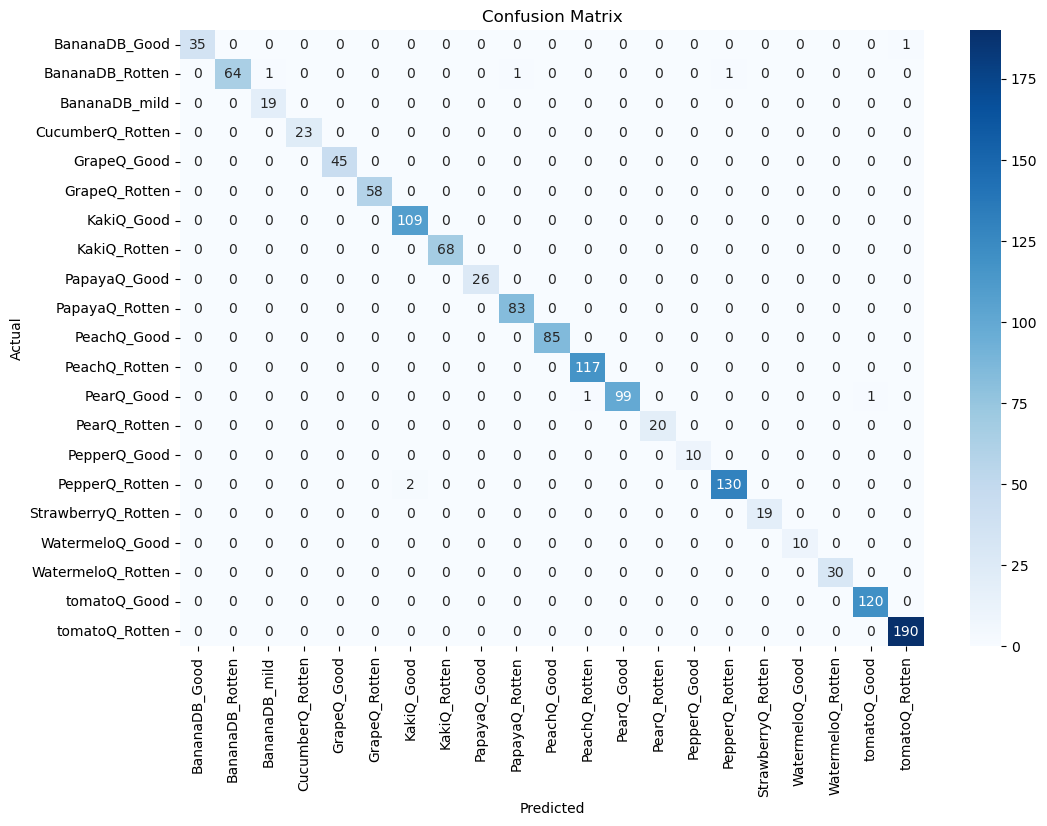

In [38]:
# CLASSIFIER 

def collect_features_for_knn(dataset_path, pca_dimensions=2):
    """
    Collect feature vectors and labels for all images in the dataset.
    Args:
        dataset_path (str): Path to the dataset.
        pca_dimensions (int): Number of PCA dimensions for feature reduction.
    Returns:
        X (np.ndarray): Feature vectors.
        y (np.ndarray): Labels.
    """
    X, y = [], []
    print("Collecting feature vectors...\n")

    # Loop through each fruit folder
    for fruit in os.listdir(dataset_path):
        fruit_path = os.path.join(dataset_path, fruit)
        if not os.path.isdir(fruit_path):
            continue
        
        # Loop through subfolders (states)
        for state in os.listdir(fruit_path):
            state_path = os.path.join(fruit_path, state)
            if not os.path.isdir(state_path):
                continue

            # Process all images in the folder
            for idx, image_name in enumerate(os.listdir(state_path)):
                image_data = load_image_data(fruit, state, idx+1)
                if image_data and image_data.matrix is not None:
                    feature_vector, hist_rgb, hist_hsv, hist_hls = calculate_feature_vector(image_data, pca_dimensions=2)
                    if feature_vector and len(feature_vector) == pca_dimensions * 3:
                        X.append(feature_vector)
                        y.append(f"{fruit}_{state}")  # Combine fruit and state as label

    print("Feature collection complete.")
    return np.array(X), np.array(y)

def train_and_evaluate_knn(X, y, k=3):
    """
    Train and evaluate the KNN model and print detailed metrics.
    Args:
        X (np.ndarray): Feature vectors.
        y (np.ndarray): Labels.
        k (int): Number of neighbors for KNN.
    """
    # Split the dataset into train (80%) and test (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"\nDataset Split: Train = {len(X_train)}, Test = {len(X_test)}")
    
    # Initialize and train the KNN classifier
    # knn = custom_knn_predict(n_neighbors=k)
    # knn.fit(X_train, y_train)
    # print("\nKNN training completed.")

    # Predictions
    y_pred = custom_knn_predict(X_train,y_train,X_test,k)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nOverall Test Accuracy: {accuracy:.2f}")

    # Detailed classification report
    print("\nClassification Report:")
    report = classification_report(y_test, y_pred, zero_division=0)
    print(report)

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y), cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step 1: Collect features and labels for the entire dataset
X, y = collect_features_for_knn(dataset_path, pca_dimensions=2)

# Step 2: Train and evaluate KNN model
train_and_evaluate_knn(X, y, k=3)
